## SVM

找到最好的超曲面 hypersurface ，將資料分類

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 模擬資料做 SVM

In [2]:
x = np.array([[6, 6], [10, 8], [3, 7], [8, 7]])

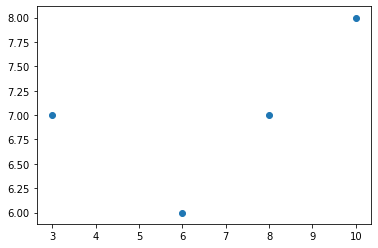

In [3]:
plt.scatter(x[:,0], x[:,1])

In [4]:
y = np.array([1, 2, 1, 2])

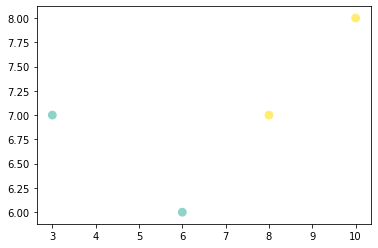

In [5]:
plt.scatter(x[:,0], x[:,1], c=y, cmap='Set3', s=60)

### step 1. 打開函數學習機

In [6]:
# C是 classifier
from sklearn.svm import SVC

In [7]:
# gamma 打嘎瑪是為了消警告，他是用來調整精確度的
clf = SVC(gamma='auto')

### step 2. 學習

In [8]:
clf.fit(x, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### step 3. 預測

In [9]:
y_predict = clf.predict(x)

In [10]:
y_predict

array([1, 2, 1, 2])

In [11]:
# 3 ~ 10
xr = np.random.rand(100)*7 + 3
# 6 ~ 8
yr = np.random.rand(100)*2 + 6

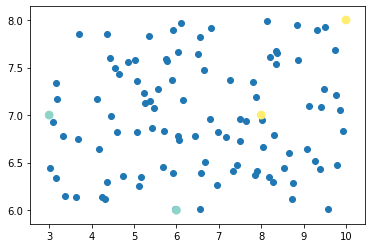

In [12]:
plt.scatter(xr, yr)
plt.scatter(x[:,0], x[:,1], c=y, cmap='Set3', s=60)

### np.c_ 合併兩個array成座標狀

In [13]:
# 把 xr yr合併在一起，他們在上面是分開列的
X = np.c_[xr, yr]

In [14]:
Y = clf.predict(X)

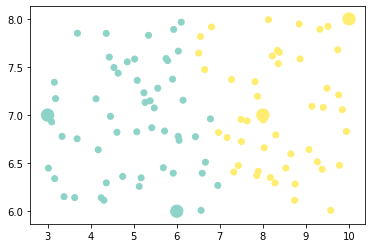

In [15]:
plt.scatter(x[:,0], x[:,1], c=y, cmap='Set3', s=150)
plt.scatter(X[:,0], X[:,1], c=Y, cmap="Set3")

#### 結果呈現

In [16]:
x_list = np.linspace(3, 10, 50)
y_list = np.linspace(6, 8, 50)

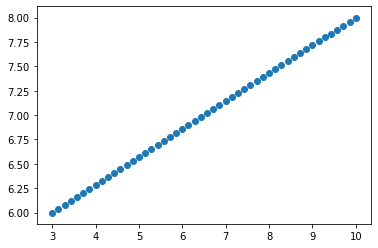

In [17]:
# 慘劇發生，我們是要找格點
X = np.c_[x_list, y_list]
plt.scatter(X[:,0], X[:,1])

## meshgrid 格點

In [18]:
X, Y = np.meshgrid(x_list, y_list)
X ,Y

(array([[ 3.        ,  3.14285714,  3.28571429, ...,  9.71428571,
          9.85714286, 10.        ],
        [ 3.        ,  3.14285714,  3.28571429, ...,  9.71428571,
          9.85714286, 10.        ],
        [ 3.        ,  3.14285714,  3.28571429, ...,  9.71428571,
          9.85714286, 10.        ],
        ...,
        [ 3.        ,  3.14285714,  3.28571429, ...,  9.71428571,
          9.85714286, 10.        ],
        [ 3.        ,  3.14285714,  3.28571429, ...,  9.71428571,
          9.85714286, 10.        ],
        [ 3.        ,  3.14285714,  3.28571429, ...,  9.71428571,
          9.85714286, 10.        ]]),
 array([[6.        , 6.        , 6.        , ..., 6.        , 6.        ,
         6.        ],
        [6.04081633, 6.04081633, 6.04081633, ..., 6.04081633, 6.04081633,
         6.04081633],
        [6.08163265, 6.08163265, 6.08163265, ..., 6.08163265, 6.08163265,
         6.08163265],
        ...,
        [7.91836735, 7.91836735, 7.91836735, ..., 7.91836735, 7.91836735

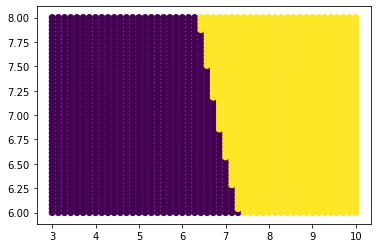

In [19]:
# X 跟 Y 需要先壓平才能湊成點
P = np.c_[X.ravel(), Y.ravel()]
C = clf.predict(P)

#如此就能看到分類的區域
plt.scatter(P[:,0], P[:,1], c = C)

# 插播：contour (等高線)用法

在二維圖中表達三維概念的一種方法

In [20]:
xL = np.array([1,2,3,4])
yL = np.array([5,6,7,8])
X, Y = np.meshgrid(xL, yL)

In [21]:
X

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [22]:
Y

array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7],
       [8, 8, 8, 8]])

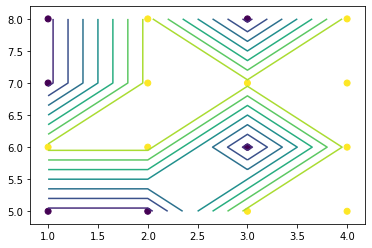

In [23]:
#快速產生隨機各種形狀的 array
Z = np.random.randint(1, 3, (4,4))

plt.contour(X, Y, Z)
plt.scatter(X.ravel(), Y.ravel(), c=Z.ravel())

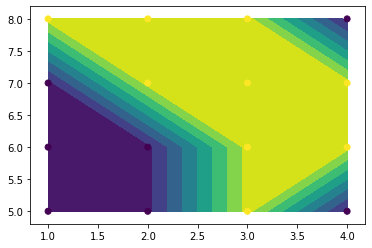

In [24]:
Z = np.random.randint(1, 3, (4,4))
# contourf 的 f 是 fill
plt.contourf(X, Y, Z)
plt.scatter(X.ravel(), Y.ravel(), c=Z.ravel())

## 資料視覺化終極版

In [25]:
# arange 跟 range 用法相同，只是回傳 array
x_arr = np.arange(3, 10, 0.02)
y_arr = np.arange(6, 8, 0.02)
X, Y = np.meshgrid(x_arr, y_arr)
P = np.c_[X.ravel(), Y.ravel()]
z = clf.predict(P)
# 這個才能畫 contourf
Z = z.reshape(X.shape)

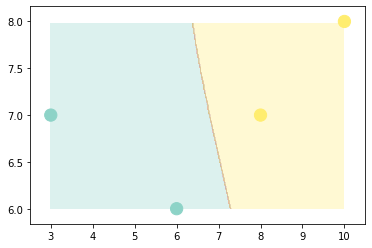

In [26]:
plt.contourf(X, Y, Z, cmap='Set3', alpha=0.3)
plt.scatter(x[:,0], x[:,1], c=y, cmap='Set3', s=150)

# 來玩玩真實資料吧！鳶尾花 Iris

In [169]:
from sklearn.datasets import load_iris

In [170]:
iris_datasets = load_iris()

In [171]:
print(iris_datasets.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [172]:
x = iris_datasets.data
y = iris_datasets.target

In [173]:
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [174]:
y[:5]

array([0, 0, 0, 0, 0])

In [269]:
# 只取前兩個特徵值，畫 2D圖
X= x[:, [2,3]]

In [270]:
Y = y

In [271]:
len(X)

150

### 區分訓練資料、測試資料

In [272]:
from sklearn.model_selection import train_test_split

In [273]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size = 0.2,
                                                   random_state = 0)

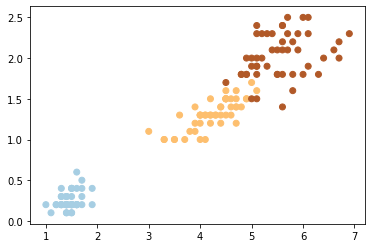

In [274]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap='Paired')

In [275]:
# 開一台函數學習機
clf = SVC(gamma='auto')

In [276]:
#訓練
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [277]:
y_predict = clf.predict(x_test)

In [278]:
# 0代表預測正確
res = y_predict - y_test
res

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

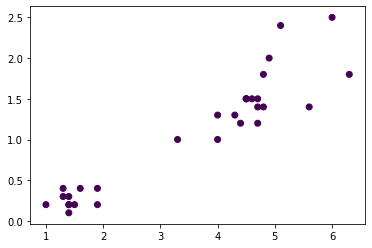

In [279]:
# 綠色正確 其他錯
plt.scatter(x_test[:,0], x_test[:,1], c=res)

## 完整分類圖

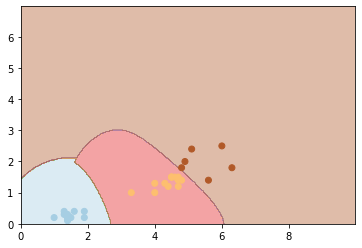

In [282]:
x0 = np.arange(0, 10, 0.02)
y0 = np.arange(0, 7, 0.02)

xm, ym = np.meshgrid(x0, y0)
P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)

Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, cmap='Paired', alpha=0.4)

# 顏色要對應 y_test(正確答案)，因為背景是依據 y_predict產生出來的分界 (自以為的分法)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap='Paired')
